In [98]:
import json
import pandas as pd
from pathlib import Path
import plotly.express as px


In [14]:
DIR = Path(r"../data/user_data")



In [15]:
files = sorted(DIR.glob("training-session*.json"))



In [16]:
file = files[0]


In [77]:
from datetime import datetime, timedelta


def polar_datetime_to_python_datetime_str(polar_dt):
    new_dt = polar_dt.replace("T", " ")
    date_time_obj = datetime.strptime(new_dt, "%Y-%m-%d %H:%M:%S.%f")

    return date_time_obj.strftime("%Y-%m-%d+%H_%M_%S_%f")


def polar_time_conversion(polar_t):
    return timedelta(seconds=int(float(polar_t.replace("PT", "").replace("S", "")))) /timedelta(minutes=1)
    


In [83]:
dfs = list()
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        if "kiloCalories" in data.keys():
            dfs.append(
                pd.DataFrame(
                    [
                        [
                            data["kiloCalories"],
                            polar_datetime_to_python_datetime_str(
                                data["exercises"][0]["startTime"]
                            ).split("+")[0],
                            data["exercises"][0]["sport"],
                            polar_time_conversion(data["exercises"][0]["duration"]),
                        ]
                    ],
                    columns=["Calories", "Date", "Sport", "Duration"],
                )
            )

df = pd.concat(dfs,ignore_index=True)


In [79]:
data["exercises"][0]

{'startTime': '2022-01-27T17:32:13.000',
 'stopTime': '2022-01-27T17:54:13.733',
 'timezoneOffset': -300,
 'duration': 'PT1320.733S',
 'distance': 0.0,
 'sport': 'STRENGTH_TRAINING',
 'kiloCalories': 255,
 'heartRate': {'min': 87, 'avg': 131, 'max': 151},
 'zones': {'fit_fat': [{'lowerLimit': 0,
    'higherLimit': 126,
    'inZone': 'PT340.001S',
    'zoneIndex': 1},
   {'lowerLimit': 126,
    'higherLimit': 240,
    'inZone': 'PT979.999S',
    'zoneIndex': 2}],
  'heart_rate': [{'lowerLimit': 93,
    'higherLimit': 111,
    'inZone': 'PT44.001S',
    'zoneIndex': 1},
   {'lowerLimit': 111,
    'higherLimit': 130,
    'inZone': 'PT391.007S',
    'zoneIndex': 2},
   {'lowerLimit': 130,
    'higherLimit': 148,
    'inZone': 'PT850.994S',
    'zoneIndex': 3},
   {'lowerLimit': 148,
    'higherLimit': 167,
    'inZone': 'PT27.001S',
    'zoneIndex': 4},
   {'lowerLimit': 167, 'higherLimit': 185, 'inZone': 'PT0S', 'zoneIndex': 5}]},
 'samples': {'heartRate': [{'dateTime': '2022-01-27T17:32:

In [84]:
df


,Calories,Date,Sport,Duration
0,43,2019-01-15,INDOOR_CYCLING,6.133333
1,236,2019-01-15,STRENGTH_TRAINING,20.066667
2,298,2019-01-19,CROSS_FIT,30.066667
3,206,2019-01-22,CROSS_FIT,17.400000
4,167,2019-01-24,CROSS_FIT,15.333333
...,...,...,...,...
170,215,2022-01-20,STRENGTH_TRAINING,22.300000
171,187,2022-01-20,YOGA,30.833333
172,72,2022-01-23,YOGA,26.800000
173,190,2022-01-24,STRENGTH_TRAINING,19.316667


In [60]:
polar_time_conversion('PT1320.733S')

'0:22:00'

In [7]:
polar_datetime_to_python_datetime_str(data["exercises"][0]["startTime"]).split("+")[0]



'2022-01-27'

In [88]:
df['Date'] =pd.to_datetime(df.Date)

In [96]:
df.loc[df.Date.dt.year==2022]

,Calories,Date,Sport,Duration
158,146,2022-01-01,STRENGTH_TRAINING,17.100000
159,194,2022-01-03,STRENGTH_TRAINING,20.366667
160,191,2022-01-09,STRENGTH_TRAINING,17.266667
161,231,2022-01-11,STRENGTH_TRAINING,20.016667
162,231,2022-01-14,STRENGTH_TRAINING,22.633333
163,67,2022-01-15,TREADMILL_RUNNING,9.000000
164,266,2022-01-16,STRENGTH_TRAINING,25.783333
165,147,2022-01-16,YOGA,29.266667
166,208,2022-01-17,STRENGTH_TRAINING,22.883333
167,119,2022-01-17,YOGA,27.550000


In [97]:
df.Date.dt.year.unique()

array([2019, 2020, 2021, 2022], dtype=int64)

<AxesSubplot:xlabel='Date', ylabel='Duration'>

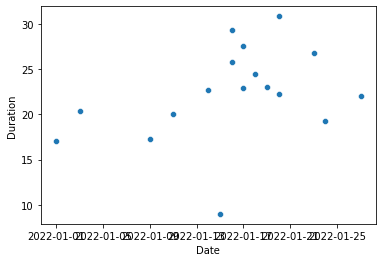

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Date", y="Duration", data=df.loc[df.Date > '2021-12-31'])



In [91]:
total_daily_calories=df.loc[df.Date > '2021-12-31'].groupby('Date').sum().reset_index()

In [92]:
from plotly_calplot import calplot

calplot(total_daily_calories, x="Date", y="Calories", name="Calories")



In [100]:
total_daily_training=df.loc[df.Date > '2021-12-31'].groupby('Date').sum().reset_index()
px.line(total_daily_training,x='Date',y='Duration')

In [104]:
df['Sessions'] = df.loc[df.Date > '2021-12-31'].groupby('Date').count().reset_index()['Calories']
df

,Calories,Date,Sport,Duration,Sessions
0,43,2019-01-15,INDOOR_CYCLING,6.133333,1.0
1,236,2019-01-15,STRENGTH_TRAINING,20.066667,1.0
2,298,2019-01-19,CROSS_FIT,30.066667,1.0
3,206,2019-01-22,CROSS_FIT,17.400000,1.0
4,167,2019-01-24,CROSS_FIT,15.333333,1.0
...,...,...,...,...,...
170,215,2022-01-20,STRENGTH_TRAINING,22.300000,NaN
171,187,2022-01-20,YOGA,30.833333,NaN
172,72,2022-01-23,YOGA,26.800000,NaN
173,190,2022-01-24,STRENGTH_TRAINING,19.316667,NaN


In [109]:
print(pd.to_timedelta(df.loc[df.Date > '2021-12-31','Duration'].sum(),unit='m'))

0 days 06:20:36


In [93]:
total_daily_calories['Date'] = pd.to_datetime(total_daily_calories['Date']) - pd.to_timedelta(7, unit='d')
total_daily_calories.groupby(['Calories', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Date')

KeyError: 'Column not found: Quantity'